<a href="https://colab.research.google.com/github/bernaberb/SentimientoTitulares/blob/main/Analisis_Sentimiento_Titulares_de_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detector de sentimiento de titulares de noticias en español

En este proyecto Python vamos a levantar los titulares de noticias en español de la página de [TodoNoticias](https://tn.com.ar) para luego intentar detectar el sentimiento de esa noticia (positivo, negativo o neutro) y mostrar la información.

Para el análisis de sentimiento utilicé la librería [PySentimiento](https://github.com/pysentimiento/pysentimiento) de [Juan Manuel Perez](https://github.com/finiteautomata), Juan Carlos Giudici y Franco M. Luque. Para el web scrapping utilicé [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Para el manejo y visualización de la información use Pandas, Seaborn y Matplotlib.

In [ ]:
!pip install pysentimiento

In [102]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Vamos a levantar los titulares del sitio de noticias www.tn.com.ar
Con una inspección de la web vemos que los titulares están en la etiqueta H3, por lo que usamos la herramienta de web scrapping Beautiful Soup para quedarnos con estos en una lista

In [103]:
url='https://www.tn.com.ar/'
response = requests.get(url)

In [104]:
soup = BeautifulSoup(response.text, 'html.parser')

pat = soup.find('body').find_all('h3')

headlines = []
for x in pat:
        hl = x.text.strip()
        headlines.append((hl))

print(headlines)

['Guerra Rusia-Ucrania', 'Crisis en el Frente de Todos', 'Qatar 2022', 'Acampe en la 9 de Julio', 'Dólar blue hoy', 'Argentina tuvo un sorteo favorable: qué potencias podría enfrentar para llegar a la final', 'LOS RIVALES DE ARGENTINA', 'Arabia Saudita, el primer examen de la Selección', 'Polonia y el poder de fuego de Robert Lewandowski', 'México, de "Tata" Martino, en el camino de Scaloni', 'Así quedaron todos los grupos del Mundial Qatar 2022', 'El fixture de la Selección argentina en el Mundial de Qatar: día y hora de los partidos', 'Lionel Scaloni, tras el sorteo del Mundial: “Creo que podremos hacer una buena fase de grupos”', 'Argentina debutará ante Arabia Saudita y sus otros rivales serán México y Polonia', 'El emotivo homenaje a Diego Maradona en la ceremonia del sorteo del Mundial de Qatar 2022', 'Los 10 jugadores más caros que estarán en el Mundial de Qatar 2022: una lista con ausencias notables', 'Se sorteó el Mundial Qatar 2022 y en las redes se acordaron de Chile, que no

Elimino los primeros 5 ya que no son titulares, son los "temas de hoy"

In [105]:
del headlines[0:5]

In [106]:
print(headlines)

['Argentina tuvo un sorteo favorable: qué potencias podría enfrentar para llegar a la final', 'LOS RIVALES DE ARGENTINA', 'Arabia Saudita, el primer examen de la Selección', 'Polonia y el poder de fuego de Robert Lewandowski', 'México, de "Tata" Martino, en el camino de Scaloni', 'Así quedaron todos los grupos del Mundial Qatar 2022', 'El fixture de la Selección argentina en el Mundial de Qatar: día y hora de los partidos', 'Lionel Scaloni, tras el sorteo del Mundial: “Creo que podremos hacer una buena fase de grupos”', 'Argentina debutará ante Arabia Saudita y sus otros rivales serán México y Polonia', 'El emotivo homenaje a Diego Maradona en la ceremonia del sorteo del Mundial de Qatar 2022', 'Los 10 jugadores más caros que estarán en el Mundial de Qatar 2022: una lista con ausencias notables', 'Se sorteó el Mundial Qatar 2022 y en las redes se acordaron de Chile, que no clasificó: los memes', "De dónde viene la frase “el grupo de la muerte” y la curiosa historia del DT que la invent

Ubicamos y eliminamos los H3 cortos porque tampoco son titulares, son cosas como "Descagate la app" y "Seguinos en las redes".

In [107]:
toDelete = []
for x in headlines:
  if len(x) < 30:
    i = headlines.index(x)
    toDelete.append((i))

In [108]:
for index in sorted(toDelete, reverse=True):
    del headlines[index]

Nos quedamos con los primeros 50 titulares, para no hacer tan pesado el análisis

In [109]:
hl_use = headlines[0:50]
print(hl_use)

['Argentina tuvo un sorteo favorable: qué potencias podría enfrentar para llegar a la final', 'Arabia Saudita, el primer examen de la Selección', 'Polonia y el poder de fuego de Robert Lewandowski', 'México, de "Tata" Martino, en el camino de Scaloni', 'Así quedaron todos los grupos del Mundial Qatar 2022', 'El fixture de la Selección argentina en el Mundial de Qatar: día y hora de los partidos', 'Lionel Scaloni, tras el sorteo del Mundial: “Creo que podremos hacer una buena fase de grupos”', 'Argentina debutará ante Arabia Saudita y sus otros rivales serán México y Polonia', 'El emotivo homenaje a Diego Maradona en la ceremonia del sorteo del Mundial de Qatar 2022', 'Los 10 jugadores más caros que estarán en el Mundial de Qatar 2022: una lista con ausencias notables', 'Se sorteó el Mundial Qatar 2022 y en las redes se acordaron de Chile, que no clasificó: los memes', "De dónde viene la frase “el grupo de la muerte” y la curiosa historia del DT que la inventó en México '86", 'Todos los

### Interpretamos los sentimientos de los titulares
Procedemos a crear una lista de diccionarios donde ponemos el titular y el sentimiento detectado. 

El output nos trae un porcentaje de certeza de que el input sea positivo, negativo o neutro. Luego de algunas pruebas elegí 0.3 como valor ya que me parece que así funciona bastante bien.


In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

In [111]:
sent_list = []
for i in range(len(hl_use)):
  sent = analyzer.predict(hl_use[i])
  if(sent.output == 'NEG'):
    sent_detect = 'Negativo'
  elif(sent.output == 'POS'):
    sent_detect = 'Positivo'
  else:
    sent_detect = 'Neutro'
  outp = {'Titular': hl_use[i], 'SentimientoDetectado': sent_detect}
  sent_list.append(outp)

Convertimos la lista en un DataFrame

In [112]:
df = pd.DataFrame(sent_list)

### Le damos estilo a la tabla y la mostramos

In [113]:

def highlight_col(x):
    #copy df to new - original data are not changed
    df = x.copy()
    #set by condition
    mask = df['SentimientoDetectado'] == 'Negativo'
    mask2 = df['SentimientoDetectado'] == 'Positivo'
    df.loc[mask, :] = 'background-color: red; opacity: 0.65'
    df.loc[~mask,:] = 'background-color: ""'
    df.loc[mask2, :] = 'background-color: green; opacity: 0.65'
    return df    

df_styled = df.style.apply(highlight_col, axis=None)

display(df_styled)

,Titular,SentimientoDetectado
0,Argentina tuvo un sorteo favorable: qué potencias podría enfrentar para llegar a la final,Neutro
1,"Arabia Saudita, el primer examen de la Selección",Neutro
2,Polonia y el poder de fuego de Robert Lewandowski,Neutro
3,"México, de ""Tata"" Martino, en el camino de Scaloni",Neutro
4,Así quedaron todos los grupos del Mundial Qatar 2022,Neutro
5,El fixture de la Selección argentina en el Mundial de Qatar: día y hora de los partidos,Neutro
6,"Lionel Scaloni, tras el sorteo del Mundial: “Creo que podremos hacer una buena fase de grupos”",Positivo
7,Argentina debutará ante Arabia Saudita y sus otros rivales serán México y Polonia,Neutro
8,El emotivo homenaje a Diego Maradona en la ceremonia del sorteo del Mundial de Qatar 2022,Neutro
9,Los 10 jugadores más caros que estarán en el Mundial de Qatar 2022: una lista con ausencias notables,Negativo


Para terminar, vemos hay de cada tipo y hacemos un gráfico de barras

In [114]:
print(df.SentimientoDetectado.value_counts())

Neutro      29
Negativo    18
Positivo     3
Name: SentimientoDetectado, dtype: int64


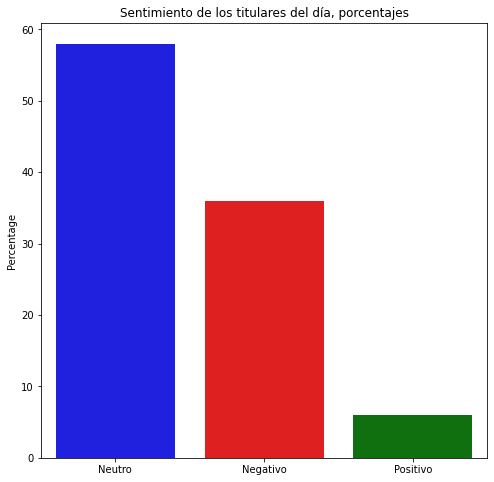

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.SentimientoDetectado.value_counts(normalize=True) * 100
clrs = ['Blue','Red','Green']
sns.barplot(x=counts.index, y=counts, ax=ax, palette=clrs).set_title('Sentimiento de los titulares del día, porcentajes')
ax.set_xticklabels(['Neutro', 'Negativo', 'Positivo'])
ax.set_ylabel("Percentage")

plt.show()